In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as m

In [2]:
wind_csv_path = "../data/cleaned/pincher_station_hourly_wind_cleaned.csv"
wind_hourly = pd.read_csv(wind_csv_path)

In [3]:
wind_hourly.head()

,timestamp,temp_c,rel_humidity,wind_speed_kmh,pressure_kpa,wind_dir_deg,timestamp_rounded,u,v,pressure_24h
0,2011-06-27 14:00:00,7.9,85.0,9.0,88.14,320.0,2011-06-27 14:00:00,5.785088,-6.894400,88.140000
1,2011-06-27 15:00:00,11.5,74.0,8.0,88.11,320.0,2011-06-27 15:00:00,5.142301,-6.128356,88.125000
2,2011-06-27 16:00:00,15.4,61.0,5.0,88.04,320.0,2011-06-27 16:00:00,3.213938,-3.830222,88.096667
3,2011-06-27 17:00:00,17.3,48.0,8.0,87.99,40.0,2011-06-27 17:00:00,-5.142301,-6.128356,88.070000
4,2011-06-27 18:00:00,18.4,47.0,15.0,87.93,120.0,2011-06-27 18:00:00,-12.990381,7.500000,88.042000


In [4]:
train = wind_hourly.iloc[:-720]
test = wind_hourly.iloc[-720:]

pred = test.wind_speed_kmh.shift(1).dropna()
obs = test.wind_speed_kmh[1:]

mae = m.mean_absolute_error(obs, pred)
rmse = np.sqrt(m.mean_squared_error(obs, pred))
mape = np.mean(np.abs((obs - pred)/obs))*100

In [5]:
 #--- OUTPUT THE RESULTS ---
print("--- Pincher Baseline Forecast Error Metrics ---")
print(f"Total Observations: {len(obs):,}")
print("-" * 35)
print(f"Mean Absolute Error (MAE):         {mae:.3f}")
print(f"Root Mean Squared Error (RMSE):    {rmse:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print("-" * 35)

--- Pincher Baseline Forecast Error Metrics ---
Total Observations: 719
-----------------------------------
Mean Absolute Error (MAE):         6.768
Root Mean Squared Error (RMSE):    9.778
Mean Absolute Percentage Error (MAPE): inf%
-----------------------------------


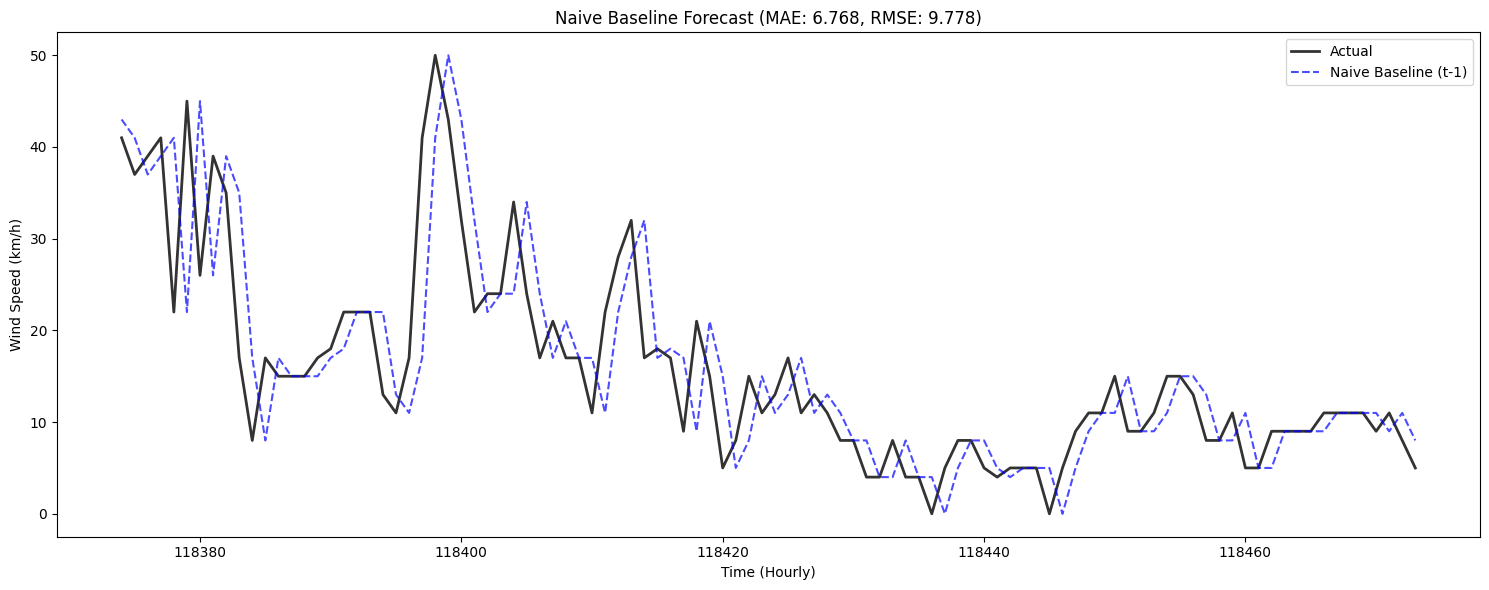

In [8]:
# 3. PLOT THE NAIVE BASELINE FORECAST
plt.figure(figsize=(15, 6))
limit = 100  # Show last 100 hours

# Align obs and pred for plotting (both start at test[1:])
plt.plot(obs[-limit:], label='Actual', color='black', linewidth=2, alpha=0.8)
plt.plot(pred[-limit:], label='Naive Baseline (t-1)', color='blue', linestyle='--', alpha=0.7)

plt.title(f"Naive Baseline Forecast (MAE: {mae:.3f}, RMSE: {rmse:.3f})")
plt.xlabel("Time (Hourly)")
plt.ylabel("Wind Speed (km/h)")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Compute metrics (as you already did)
pred = test.wind_speed_kmh.shift(1).dropna()
obs = test.wind_speed_kmh[1:]

rmse = np.sqrt(m.mean_squared_error(obs, pred))


# Store results
baseline_results = {
    'Model': 'Naive (Persistence)',
    'MAE': mae,
    'RMSE': rmse,
    
}

# Save to CSV
pd.DataFrame([baseline_results]).to_csv('../results/pincher_naive_baseline_metrics.csv', index=False)

print("Baseline metrics saved to 'pincher_naive_baseline_metrics.csv'")